In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/Thesis

[Errno 2] No such file or directory: 'drive/MyDrive/Thesis'
/content/drive/MyDrive/Thesis


In [ ]:
!pip install pycodestyle pycodestyle_magic
!pip install flake8
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [ ]:
# %%pycodestyle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve, precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Data Preparation

## Load DataFrame


In [ ]:
# %%pycodestyle
df = pd.read_csv('creditcard.csv')
df.head()
# Time: Number of seconds elapsed between this transaction and the first transaction in the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


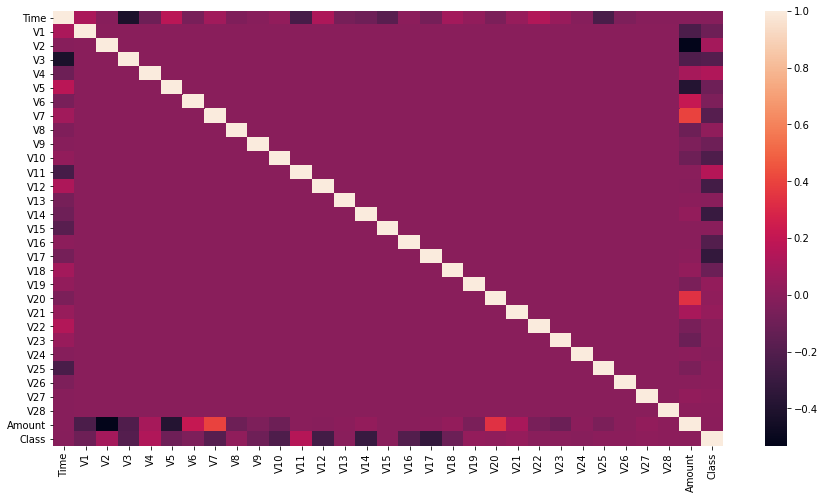

In [ ]:
# %%pycodestyle
plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(15, 8))
sns.heatmap(df.corr())

[Text(0, 0, 'Genuine (0)'), Text(0, 0, 'Fraud (1)')]

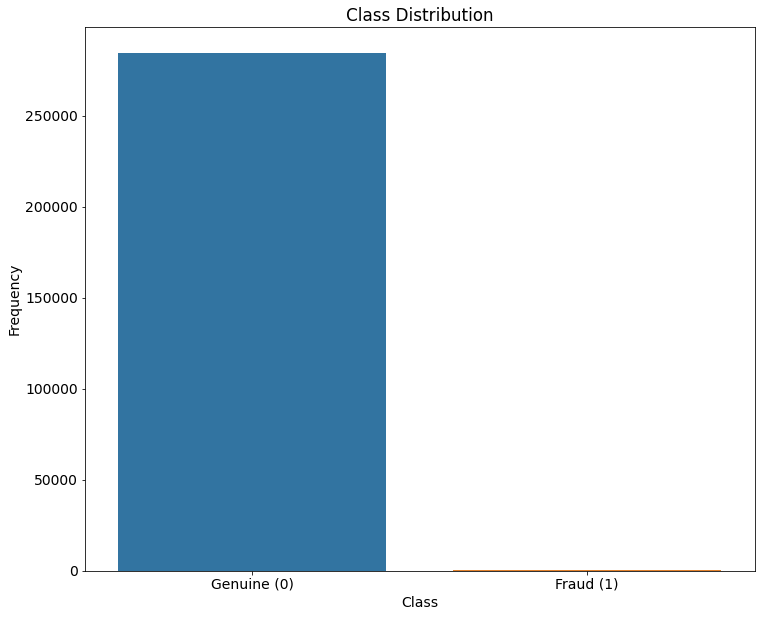

In [ ]:
# %%pycodestyle
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.countplot(data=df, x='Class')
ax.set_title('Class Distribution')
ax.set(xlabel="Class", ylabel = "Frequency")
ax.set_xticklabels(['Genuine (0)', 'Fraud (1)'])

## Normalization ('Amount')


In [ ]:
scaler = StandardScaler()
df[['Amount']] = scaler.fit_transform(df[['Amount']].values)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Split X, y

In [ ]:
# %%pycodestyle
y = df[['Class']]
X = df.drop(['Class'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

## Random Oversampling

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=14)
X_over, y_over = oversampler.fit_resample(X_train,y_train)
y_over = np.ravel(y_over)
Counter(y_over)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 199013, 1: 199013})

## Random Undersampling

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=14)
X_under, y_under = undersampler.fit_resample(X_train,y_train)
y_under = np.ravel(y_under)
Counter(y_under)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 351, 1: 351})

## SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority',random_state=14)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
y_smote = np.ravel(y_smote)
Counter(y_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 199013, 1: 199013})

## Tomek Links Removal

In [ ]:
tomek = TomekLinks(sampling_strategy='majority', random_state=0)
X_tomek, y_tomek = tomek.fit_resample(X_train,y_train)
y_tomek = np.ravel(y_tomek)
Counter(y_tomek)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 198999, 1: 351})

# Logistic Regression no Resampling

## Parameter Tuning using Cross-Validation (GridSearchCV)

In [ ]:
search_range = np.linspace(0.1,1,10)
PARAM = {'C':search_range}
clf = LogisticRegression(max_iter=1000)
search = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [ ]:
# %%pycodestyle
search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, score=0.999, total=  21.5s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.5s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, score=0.999, total=  10.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   31.5s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, score=0.999, total=   6.6s
[CV] C=0.1 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, score=0.999, total=   7.5s
[CV] C=0.1 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, score=0.999, total=   7.3s
[CV] C=0.1 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, score=0.999, total=  14.1s
[CV] C=0.1 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, score=0.999, total=  24.3s
[CV] C=0.1 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, score=0.999, total=   7.3s
[CV] C=0.1 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, score=0.999, total=   7.6s
[CV] C=0.1 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.1, score=0.999, total=   7.9s
[CV] C=0.2 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.2, score=0.999, total=   7.0s
[CV] C=0.2 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.2, score=0.999, total=  19.4s
[CV] C=0.2 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.2, score=0.999, total=  20.2s
[CV] C=0.2 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.2, score=0.999, total=  19.6s
[CV] C=0.2 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.2, score=0.999, total=  12.1s
[CV] C=0.2 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.2, score=0.999, total=  15.0s
[CV] C=0.2 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.2, score=0.999, total=   5.4s
[CV] C=0.2 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.2, score=0.999, total=  10.5s
[CV] C=0.2 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.2, score=0.999, total=   9.0s
[CV] C=0.2 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.2, score=0.999, total=   7.7s
[CV] C=0.30000000000000004 ...........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.30000000000000004, score=0.999, total=  10.7s
[CV] C=0.30000000000000004 ...........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.30000000000000004, score=0.999, total=  10.2s
[CV] C=0.30000000000000004 ...........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.30000000000000004, score=0.999, total=   7.0s
[CV] C=0.30000000000000004 ...........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.30000000000000004, score=0.999, total=   9.6s
[CV] C=0.30000000000000004 ...........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.30000000000000004, score=0.999, total=   9.9s
[CV] C=0.30000000000000004 ...........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.30000000000000004, score=0.999, total=   9.7s
[CV] C=0.30000000000000004 ...........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.30000000000000004, score=0.999, total=  15.4s
[CV] C=0.30000000000000004 ...........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.30000000000000004, score=0.999, total=  11.4s
[CV] C=0.30000000000000004 ...........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.30000000000000004, score=0.999, total=   8.4s
[CV] C=0.30000000000000004 ...........................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.30000000000000004, score=0.999, total=  18.1s
[CV] C=0.4 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.4, score=0.999, total=  12.7s
[CV] C=0.4 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.4, score=0.999, total=   3.2s
[CV] C=0.4 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.4, score=0.999, total=   7.3s
[CV] C=0.4 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.4, score=0.999, total=  12.0s
[CV] C=0.4 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.4, score=0.999, total=   9.2s
[CV] C=0.4 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.4, score=0.999, total=   3.4s
[CV] C=0.4 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.4, score=0.999, total=  12.8s
[CV] C=0.4 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.4, score=0.999, total=   7.8s
[CV] C=0.4 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.4, score=0.999, total=  10.1s
[CV] C=0.4 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.4, score=0.999, total=  12.3s
[CV] C=0.5 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.5, score=0.999, total=   7.8s
[CV] C=0.5 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.5, score=0.999, total=   7.5s
[CV] C=0.5 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.5, score=0.999, total=   8.4s
[CV] C=0.5 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.5, score=0.999, total=  10.9s
[CV] C=0.5 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.5, score=0.999, total=  14.3s
[CV] C=0.5 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.5, score=0.999, total=   7.6s
[CV] C=0.5 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.5, score=0.999, total=  11.0s
[CV] C=0.5 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.5, score=0.999, total=  14.2s
[CV] C=0.5 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.5, score=0.999, total=   8.1s
[CV] C=0.5 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.5, score=0.999, total=  17.6s
[CV] C=0.6 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.6, score=0.999, total=  12.0s
[CV] C=0.6 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.6, score=0.999, total=   8.6s
[CV] C=0.6 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.6, score=0.999, total=   8.1s
[CV] C=0.6 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.6, score=0.999, total=  14.7s
[CV] C=0.6 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.6, score=0.998, total=   3.2s
[CV] C=0.6 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.6, score=0.999, total=   9.0s
[CV] C=0.6 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.6, score=0.999, total=   7.4s
[CV] C=0.6 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.6, score=0.999, total=  25.6s
[CV] C=0.6 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.6, score=0.999, total=   6.1s
[CV] C=0.6 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.6, score=0.999, total=  18.8s
[CV] C=0.7000000000000001 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.7000000000000001, score=0.999, total=   9.2s
[CV] C=0.7000000000000001 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.7000000000000001, score=0.999, total=   7.3s
[CV] C=0.7000000000000001 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.7000000000000001, score=0.999, total=  10.9s
[CV] C=0.7000000000000001 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.7000000000000001, score=0.999, total=   8.9s
[CV] C=0.7000000000000001 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.7000000000000001, score=0.999, total=   7.3s
[CV] C=0.7000000000000001 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.7000000000000001, score=0.999, total=  15.4s
[CV] C=0.7000000000000001 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.7000000000000001, score=0.999, total=  11.1s
[CV] C=0.7000000000000001 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.7000000000000001, score=0.999, total=   9.0s
[CV] C=0.7000000000000001 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.7000000000000001, score=0.999, total=   8.3s
[CV] C=0.7000000000000001 ............................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.7000000000000001, score=0.999, total=   7.9s
[CV] C=0.8 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.8, score=0.999, total=  10.9s
[CV] C=0.8 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.8, score=0.999, total=  12.7s
[CV] C=0.8 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.8, score=0.999, total=   8.1s
[CV] C=0.8 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.8, score=0.999, total=   8.2s
[CV] C=0.8 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.8, score=0.999, total=  16.4s
[CV] C=0.8 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.8, score=0.999, total=   8.3s
[CV] C=0.8 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.8, score=0.999, total=  10.5s
[CV] C=0.8 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.8, score=0.999, total=   7.9s
[CV] C=0.8 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.8, score=0.999, total=   6.3s
[CV] C=0.8 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.8, score=0.999, total=  15.8s
[CV] C=0.9 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.9, score=0.999, total=   8.3s
[CV] C=0.9 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.9, score=0.999, total=   7.3s
[CV] C=0.9 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.9, score=0.999, total=  11.0s
[CV] C=0.9 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.9, score=0.999, total=   8.2s
[CV] C=0.9 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.9, score=0.998, total=   3.2s
[CV] C=0.9 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.9, score=0.999, total=  17.1s
[CV] C=0.9 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.9, score=0.999, total=  14.1s
[CV] C=0.9 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.9, score=0.999, total=   9.1s
[CV] C=0.9 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.9, score=0.999, total=   9.0s
[CV] C=0.9 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=0.9, score=0.999, total=  14.9s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=1.0, score=0.999, total=   9.6s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=1.0, score=0.999, total=  13.6s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=1.0, score=0.999, total=  13.9s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=1.0, score=0.999, total=   9.0s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=1.0, score=0.998, total=   3.3s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=1.0, score=0.999, total=  14.0s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=1.0, score=0.999, total=   7.6s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=1.0, score=0.999, total=  12.1s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=1.0, score=0.999, total=  18.0s
[CV] C=1.0 ...........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............................... C=1.0, score=0.999, total=  13.2s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 18.0min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# %%pycodestyle
best_C = search.best_params_['C']
print(best_C)
LR = LogisticRegression(C=best_C, max_iter= 1000)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

0.1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Confustion matrix for LR not Resampling

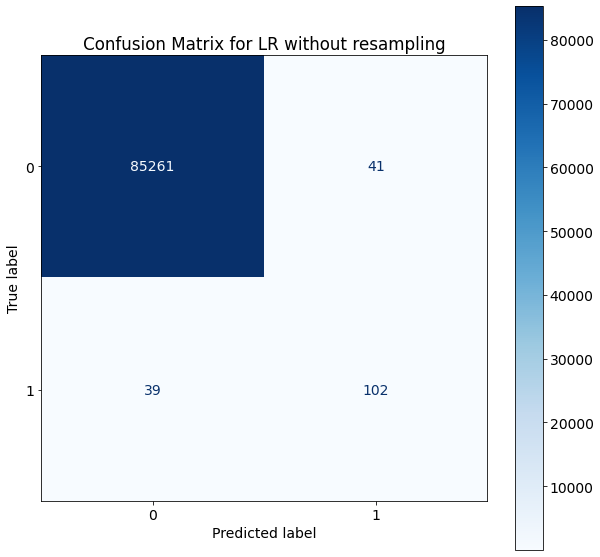

In [ ]:
# %%pycodestyle
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR without resampling')
plot_confusion_matrix(LR, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall, F1 score for LR not Resampling

### Precision

In [ ]:
precision_LR_no_resampling_1 = round(precision_score(y_test, y_pred),5)
print(precision_LR_no_resampling_1)
precision_LR_no_resampling_0 = round(precision_score(y_test, y_pred, pos_label=0),5)
print(precision_LR_no_resampling_0)
precision_LR_no_resampling_avg = round(precision_score(y_test, y_pred, average='micro'),5)
print(precision_LR_no_resampling_avg)

0.71329
0.99954
0.99906


### Recall

In [ ]:
recall_LR_no_resampling_1 = round(recall_score(y_test, y_pred),5)
print(recall_LR_no_resampling_1)
recall_LR_no_resampling_0 = round(recall_score(y_test, y_pred, pos_label=0),5)
print(recall_LR_no_resampling_0)
recall_LR_no_resampling_avg = round(recall_score(y_test, y_pred, average='micro'),5)
print(recall_LR_no_resampling_avg)

0.7234
0.99952
0.99906


### F1 Score

In [ ]:
f1_LR_no_resampling_1 = round(f1_score(y_test, y_pred),5)
print(f1_LR_no_resampling_1)
f1_LR_no_resampling_0 = round(f1_score(y_test, y_pred, pos_label=0),5)
print(f1_LR_no_resampling_0)
f1_LR_no_resampling_avg = round(f1_score(y_test, y_pred, average='micro'),5)
print(f1_LR_no_resampling_avg)

0.71831
0.99953
0.99906


### Classification report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99954   0.99952   0.99953     85302
     Class 1    0.71329   0.72340   0.71831       141

    accuracy                        0.99906     85443
   macro avg    0.85641   0.86146   0.85892     85443
weighted avg    0.99907   0.99906   0.99907     85443



## PR Curve

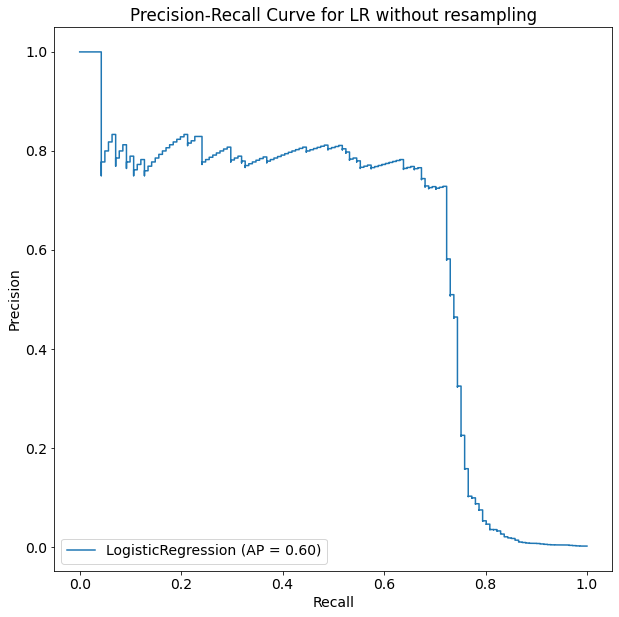

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR without resampling')
plot_precision_recall_curve(LR, X_test, y_test, ax=ax)

## ROC Curve

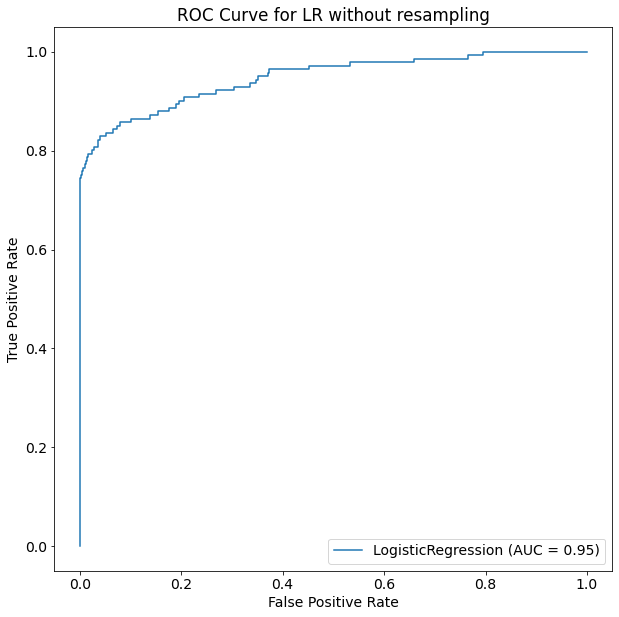

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR without resampling')
plot_roc_curve(LR, X_test, y_test, ax=ax)

# Logistic Regression with Random Oversampling

## Parameter Tuning using Cross-Validation

In [ ]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [ ]:
search_over.fit(X_over, y_over)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.919, total=   3.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] ............................... C=0.1, score=0.941, total=   4.7s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


[CV] ............................... C=0.1, score=0.937, total=   4.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.944, total=   8.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.920, total=   3.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.944, total=  13.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.939, total=   4.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.946, total=   7.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.946, total=   8.5s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over, y_over)
y_over_pred = LR_over.predict(X_test)

0.1


## Confusion matrix for LR with Random Oversampling

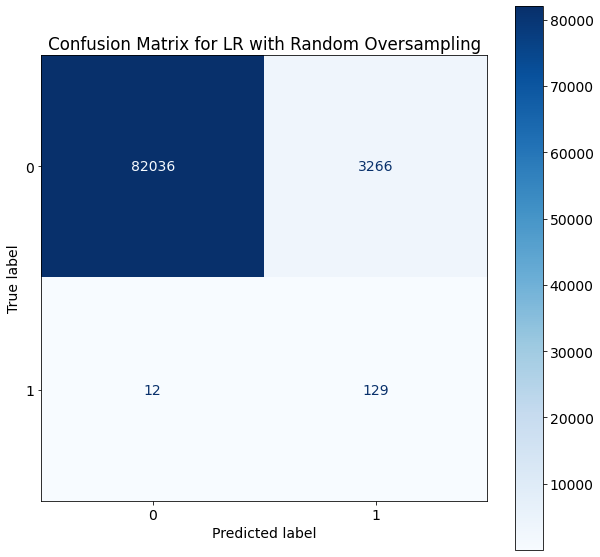

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with Random Oversampling')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall, F1 score for LR with Random Oversampling

### Precision

In [ ]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.038
0.99985
0.99827


### Recall

In [ ]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.91489
0.96171
0.96164


### F1 Score

In [ ]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.07296
0.98041
0.97891


### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99985   0.96171   0.98041     85302
     Class 1    0.03800   0.91489   0.07296       141

    accuracy                        0.96164     85443
   macro avg    0.51893   0.93830   0.52669     85443
weighted avg    0.99827   0.96164   0.97891     85443



## PR Curve

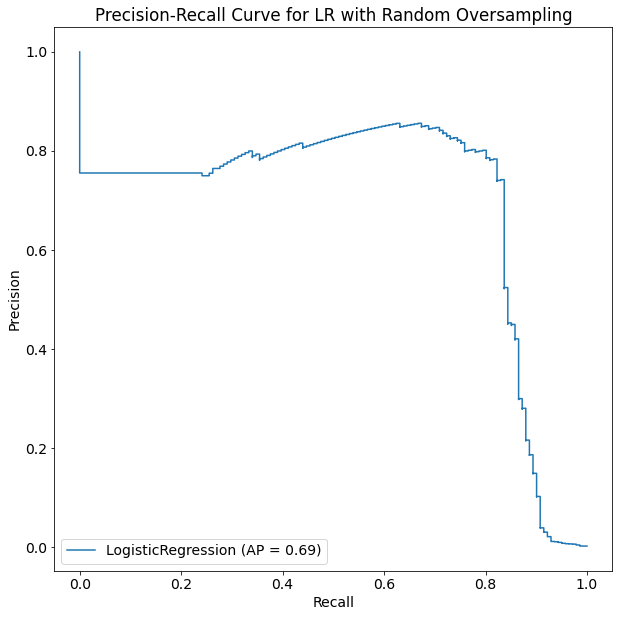

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR with Random Oversampling')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=ax)

## ROC Curve

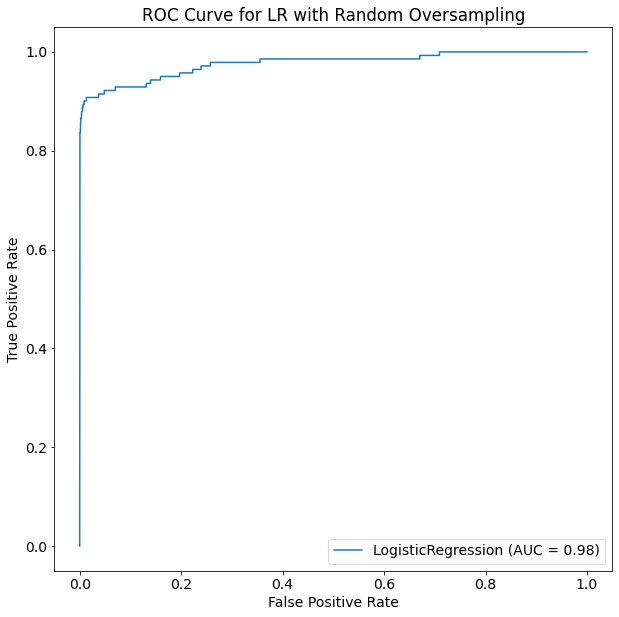

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR with Random Oversampling')
plot_roc_curve(LR_over, X_test, y_test, ax=ax)

# Logistic Regression with Random Undersampling

## Parameter Tuning using Cross-Validation

In [ ]:
clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under,y_under)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.958, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.930, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.929, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.871, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.1, score=0.929, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.957, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.930, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.915, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.914, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.929, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.914, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under, y_under)
y_under_pred = LR_under.predict(X_test)

0.9


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


## Confusion matrix for LR with Random Undersampling

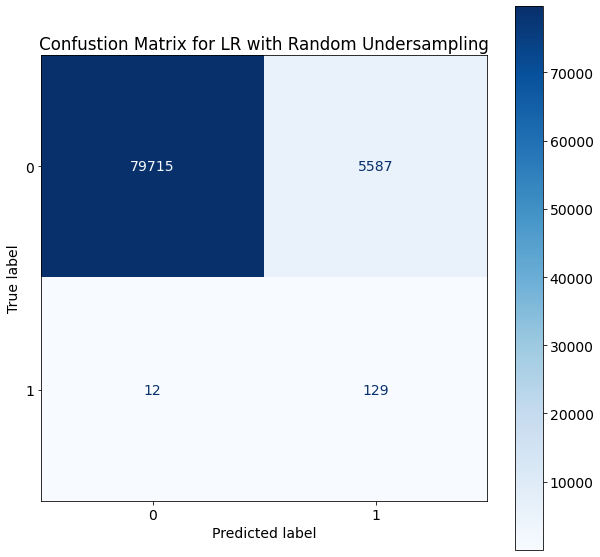

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confustion Matrix for LR with Random Undersampling')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall, F1 score for LR with Random Undersampling

### Precision

In [ ]:
precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

0.02257
0.99985
0.99824


### Recall

In [ ]:
recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

0.91489
0.9345
0.93447


### F1 Score

In [ ]:
f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

0.04405
0.96607
0.96455


### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99985   0.93450   0.96607     85302
     Class 1    0.02257   0.91489   0.04405       141

    accuracy                        0.93447     85443
   macro avg    0.51121   0.92470   0.50506     85443
weighted avg    0.99824   0.93447   0.96455     85443



## PR Curve

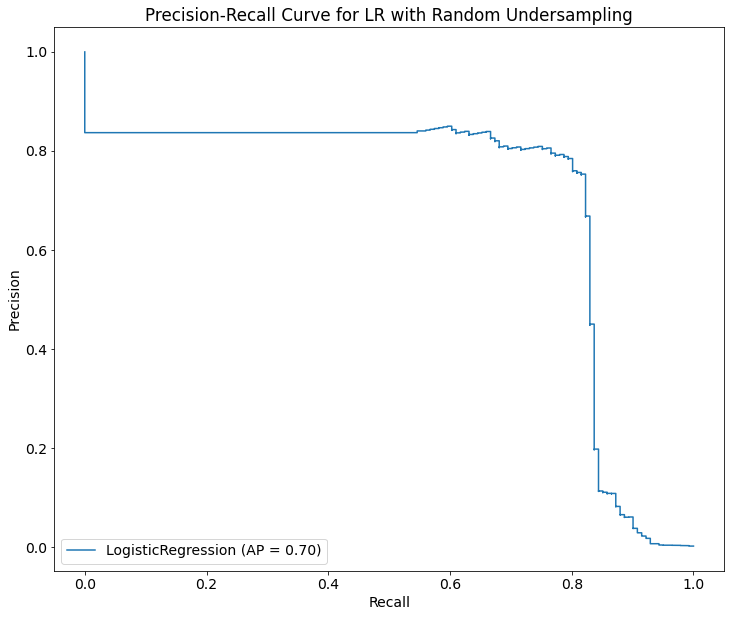

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Precision-Recall Curve for LR with Random Undersampling')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=ax)

## ROC Curve

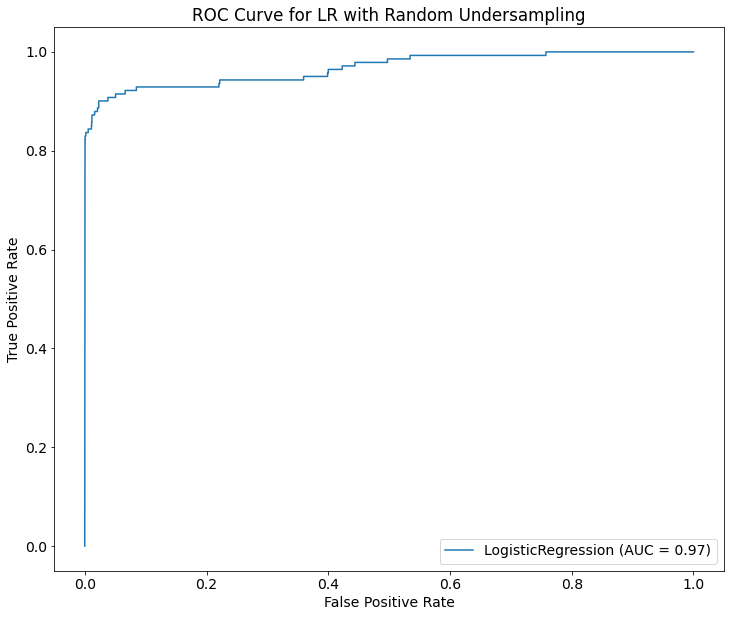

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for LR with Random Undersampling')
plot_roc_curve(LR_under, X_test, y_test, ax=ax)

# Logistic Regression with SMOTE

## Parameter Tuning using Cross-Validation

In [ ]:
clf = LogisticRegression(max_iter=10000)
search_smote = GridSearchCV(clf,PARAM,cv=10, verbose=3)

In [ ]:
search_smote.fit(X_smote, y_smote)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.975, total=  10.9s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


[CV] ............................... C=0.1, score=0.972, total=   4.8s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.7s remaining:    0.0s


[CV] ............................... C=0.1, score=0.976, total=   9.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   4.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.971, total=   4.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   8.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   7.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   4.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.958, total=   2.8s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
best_C = search_smote.best_params_['C']
print(best_C)

1.0


In [ ]:
LR_smote = LogisticRegression(C=best_C, max_iter=10000, verbose=3)
LR_smote.fit(X_smote, y_smote)
y_smote_pred = LR_smote.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished


## Confusion matrix for LR with SMOTE

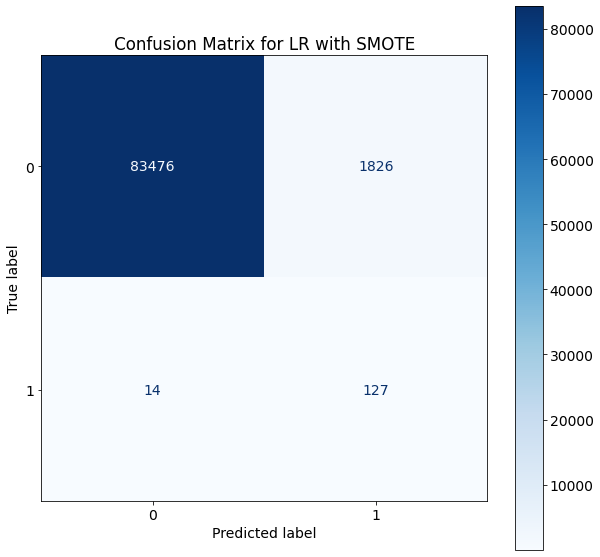

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with SMOTE')
plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall, F1 score for LR with SMOTE

### Precision

In [ ]:
precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

0.06503
0.99983
0.99829


### Recall

In [ ]:
recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

0.90071
0.97859
0.97847


### F1 Score

In [ ]:
f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

0.1213
0.9891
0.98767


### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99983   0.97859   0.98910     85302
     Class 1    0.06503   0.90071   0.12130       141

    accuracy                        0.97847     85443
   macro avg    0.53243   0.93965   0.55520     85443
weighted avg    0.99829   0.97847   0.98767     85443



## PR Curve

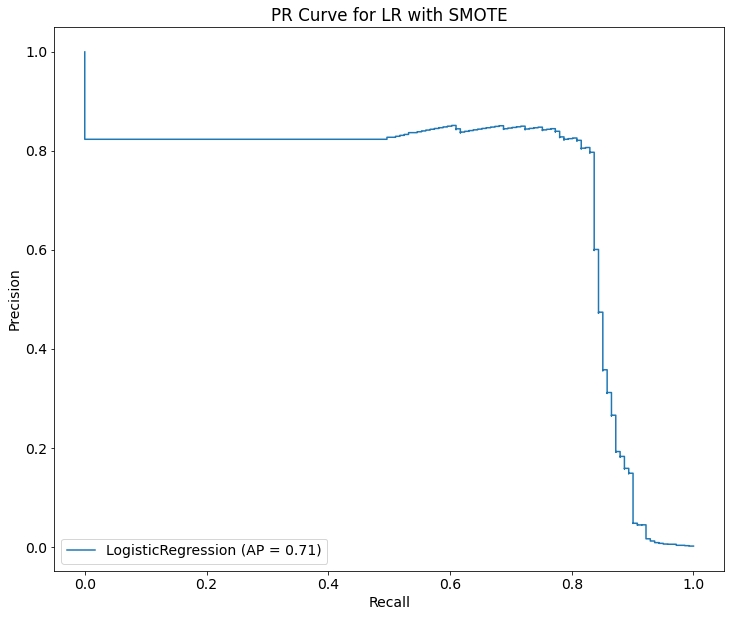

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for LR with SMOTE')
plot_precision_recall_curve(LR_smote,X_test, y_test, ax=ax)

## ROC Curve

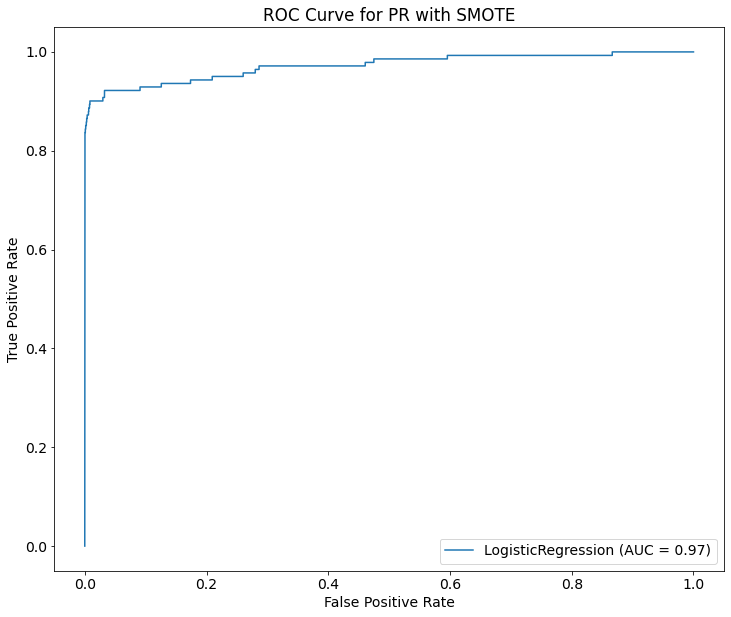

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for PR with SMOTE')
plot_roc_curve(LR_smote, X_test, y_test, ax=ax)

# Logistic Regression with Tomek Links Removal

## Parameter Tuning using Cross-Validation

In [ ]:
clf = LogisticRegression(max_iter=10000)
search_tomek = GridSearchCV(clf, PARAM, cv=10, verbose=3)

In [ ]:
search_tomek.fit(X_tomek, y_tomek)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.999, total=  12.9s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


[CV] ............................... C=0.1, score=0.999, total=  15.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.9s remaining:    0.0s


[CV] ............................... C=0.1, score=0.999, total=  15.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=  12.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=   8.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=  18.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=   8.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=   7.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=   8.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 16.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
best_C = search_tomek.best_params_['C']
print(best_C)

0.4


In [ ]:
LR_tomek = LogisticRegression(C=best_C, max_iter=10000, verbose=3)
LR_tomek.fit(X_tomek, y_tomek)
y_tomek_pred = LR_tomek.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s finished


## Confusion matrix for LR with Tomek Links Removal

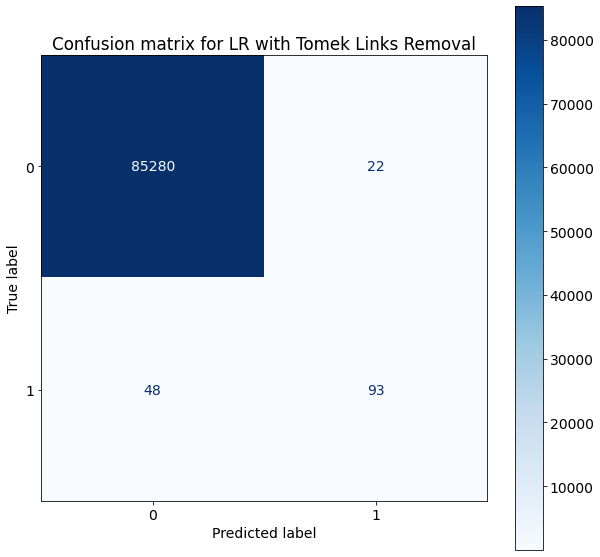

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Confusion matrix for LR with Tomek Links Removal")
plot_confusion_matrix(LR_tomek, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall, F1 score for LR with Tomek Links Removal

### Precision

### Recall

### F1 Score

### Classification Report

## PR Curve

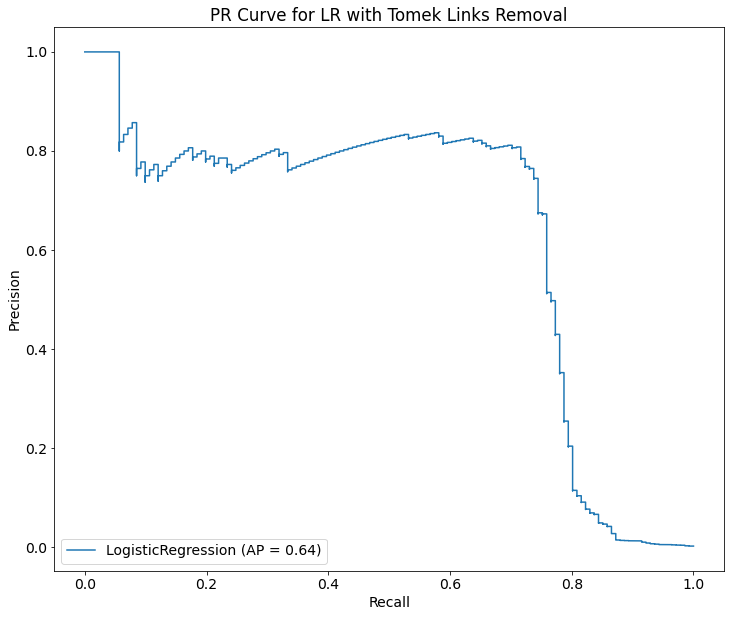

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for LR with Tomek Links Removal')
plot_precision_recall_curve(LR_tomek, X_test, y_test, ax=ax)